In [3]:
import sys
sys.path.append('/home/simon/Code/MasterThesis/project/include')
import cv2
import os
from os.path import join
import numpy as np
import utils as utl
import matplotlib.pyplot as plt
import time
import features as ft

BASE_PATH = '/data/simon/ownCloud/Data/'

UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/P048R.png
Img details: (1080, 1920, 3), uint8, 6220800


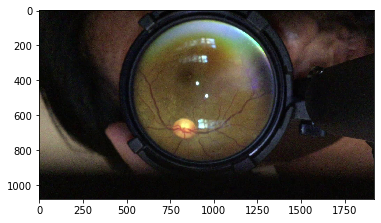

In [4]:
img = utl.load_image(join(BASE_PATH, 'QA Dataset/P048R.png'))
print(f'Img details: {img.shape}, {img.dtype}, {img.size}')
plt.imshow(img[:,:, [2, 1, 0]])

In [6]:
%timeit get_features(img)

669 ms ± 52.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


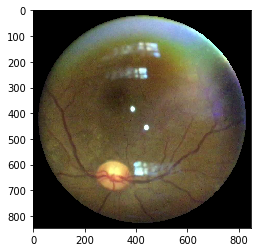

In [4]:
mask, circle = utl.get_retina_mask(img)
img = cv2.bitwise_and(img, mask)
img = utl.crop_to_circle(img, circle)
plt.imshow(img[:,:, [2, 1, 0]])


In [1]:
def preprocess_frames(img, out_path, idx):
    if (type(img) != np.ndarray and type(img) != np.memmap) or img is None:
        return None

    img_enh = utl.enhance_contrast_image(img, clip_limit=4, tile_size=12)
    mask, circle = utl.get_retina_mask(img_enh)
    if circle[2] == 0:
        return None

    img = cv2.bitwise_and(img, mask)
    img = utl.crop_to_circle(img, circle)
    cv2.imwrite(join(out_path, '', f'{idx}.jpg'), img)
    return img

def get_features(img):
    extractor = ft.FeatureExtractor()
    frame = preprocess_frames(img, '/tmp', 1)
    frame = np.random.randint(0, 256, (850, 850, 3), dtype=np.uint8) if frame is None or frame.size == 0 else frame
    feature_vec = extractor.extract_single_feature_vector(frame, extractor.haralick_dist, extractor.hist_size, extractor.clip_limit)
    return feature_vec
